Importing Modules

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
raw_data = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/database.csv")
raw_data.head(6)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,01/10/1965,13:36:32,-13.405,166.629,Earthquake,35.0,NaN,NaN,6.7,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic


In [4]:
print(raw_data.shape)
print(raw_data.columns)

(23412, 21)
Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')


Selecting main features from earthquake_data and creating main_data object of those features, namely, Date, Time, Latitude, Longitude, Depth, Magnitude.

In [5]:
main_data = raw_data[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
main_data.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


checking any null value and min max value of different columns

In [6]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       23412 non-null  object 
 1   Time       23412 non-null  object 
 2   Latitude   23412 non-null  float64
 3   Longitude  23412 non-null  float64
 4   Depth      23412 non-null  float64
 5   Magnitude  23412 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.1+ MB


In [7]:
main_data.describe()

,Latitude,Longitude,Depth,Magnitude
count,23412.000000,23412.000000,23412.000000,23412.000000
mean,1.679033,39.639961,70.767911,5.882531
std,30.113183,125.511959,122.651898,0.423066
min,-77.080000,-179.997000,-1.100000,5.500000
25%,-18.653000,-76.349750,14.522500,5.600000
50%,-3.568500,103.982000,33.000000,5.700000
75%,26.190750,145.026250,54.000000,6.000000
max,86.005000,179.998000,700.000000,9.100000


scaling of date and time to unix time to fit in our model

In [8]:
import datetime
import time
timestamp = []
for d, t in zip(main_data['Date'],main_data['Time']):
    try:
        ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        timestamp.append('Error')

adding timestamp column to our data

In [9]:
timeStamp = pd.Series(timestamp)
main_data['Timestamp'] = timeStamp.values
final_data = main_data.drop(['Date', 'Time'], axis=1)
final_data = final_data[final_data.Timestamp != 'Error']
final_data.head()

<ipython-input-9-6c8fcee3dfed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_data['Timestamp'] = timeStamp.values


,Latitude,Longitude,Depth,Magnitude,Timestamp
0,19.246,145.616,131.6,6.0,-157630542.0
1,1.863,127.352,80.0,5.8,-157465811.0
2,-20.579,-173.972,20.0,6.2,-157355642.0
3,-59.076,-23.557,15.0,5.8,-157093817.0
4,11.938,126.427,15.0,5.8,-157026430.0


creating a fina_data object which doesn't include date and time columns and rows in which timestamp have error value

In [10]:
final_data = main_data.drop(['Date', 'Time'], axis=1)
final_data = final_data[final_data.Timestamp != 'Error']
final_data.head()

,Latitude,Longitude,Depth,Magnitude,Timestamp
0,19.246,145.616,131.6,6.0,-157630542.0
1,1.863,127.352,80.0,5.8,-157465811.0
2,-20.579,-173.972,20.0,6.2,-157355642.0
3,-59.076,-23.557,15.0,5.8,-157093817.0
4,11.938,126.427,15.0,5.8,-157026430.0


Visualising data

the earthquakes from the database in visualized on to the world map which shows clear representation of the locations where frequency of the earthquake will be more. 

In [14]:
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 864.1/864.1 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 68.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [16]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = final_data["Longitude"].tolist()
latitudes = final_data["Latitude"].tolist()
x,y = m(longitudes,latitudes)

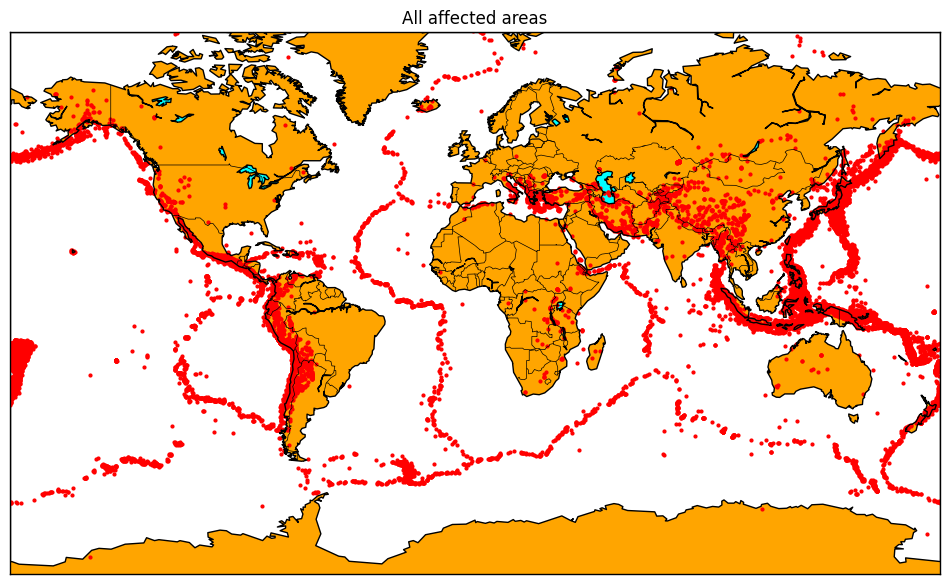

In [17]:
fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'red')
m.drawcoastlines()
m.fillcontinents(color='orange',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

Splitting the Data


In [18]:
x = final_data[['Timestamp', 'Latitude', 'Longitude']]
y = final_data[['Magnitude', 'Depth']]
print(x.shape)
print(y.shape)

(23409, 3)
(23409, 2)


In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(18727, 3) (4682, 3) (18727, 2) (4682, 2)


Training Model

Random forest regression

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)
rf_pred=rf.predict(x_test)

In [21]:
print('Training score',rf.score(x_train,y_train))
print('Testing score',rf.score(x_test, y_test))


Training score 0.9133682294911707
Testing score 0.3926671400442392


In [22]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 20, 50, 100, 200, 500]}

grid_obj = GridSearchCV(rf, parameters)
grid_fit = grid_obj.fit(x_train, y_train)
best_fit = grid_fit.best_estimator_
gvc_pre=best_fit.predict(x_test)

In [23]:
print(best_fit.score(x_train,y_train))
print(best_fit.score(x_test, y_test))

0.9158058552973328
0.3969343336896403


function to convert input date to unix timestamp

In [24]:
from datetime import datetime
epoch = datetime(1970, 1, 1)

def mapdateTotime(x):
    try:
        dt = datetime.strptime(x, "%m/%d/%Y")
    except ValueError:
        dt = datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ")
    diff = dt - epoch
    return diff.total_seconds()


In [25]:
latitude = float(input("Enter Latitude between -77 to 86:"))
longitude = float(input("Enter Longitude between -180 to 180:"))
date = input("Enter the date (Month/Day/Year format):")
Input_values = np.asarray([[mapdateTotime(date),latitude,longitude]],dtype=np.float32)
output_values=rf.predict(Input_values)
print('magnitude depth(km)',output_values)


Enter Latitude between -77 to 86:80
Enter Longitude between -180 to 180:182
Enter the date (Month/Day/Year format):11/5/2020
magnitude depth(km) [[  5.712  189.5001]]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [26]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = longitude
latitudes = latitude
x,y = m(longitudes,latitudes)

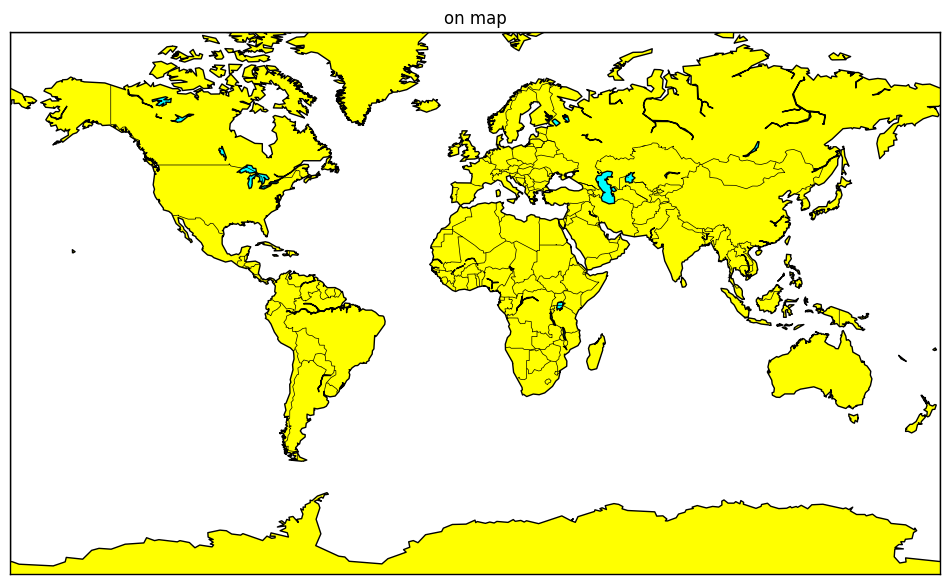

In [27]:
fig = plt.figure(figsize=(12,10))
plt.title("on map")

m.plot(x, y, "o", markersize = 2, color = 'red')
m.drawcoastlines()
m.fillcontinents(color='yellow',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()